### **Florida Moves:**
The objective of this project is to analyze migrations to and from the state of Florida, between the years of 2014-2018, based on data sourced from the US Census Bureau ([link to data here](https://www.census.gov/data/tables/2018/demo/geographic-mobility/county-to-county-migration-2014-2018.html)). In this project, I analyze and visualize the migration winners and losers on both the state and county level, as well as attempt to understand where the positive flows were headed to in Florida. 

##### Importing, cleaning, and preparing data for anaylsis.

In [4]:
#Import packages and set visualization template. 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#Import data and drop redundant or unimportant columns.
migrations = pd.read_excel("~/florida_flows.xlsx")
migrations.drop(['state_a_code', 'county_a_code', 'state_b_code', 'county_b_code', 'state_a'], axis=1, inplace=True)
migrations.rename(columns={'county_a': 'florida_county', 'state_b': 'from_state', 'county_b': 'from_county', 'county_inflows': 'inflows', 'county_outflows': 'outflows'}, inplace=True)

##### Begin basic state-level analysis and visualization. 
I wanted to understand what states are contributing most to Florida's population growth and if an often quoted factor for moving to Florida, low taxes, actually plays a substantive role in Florida's growth. While this analysis does not attempt to find causation, it is interested in the size of contribution high-tax states make to Florida's growth.

In [48]:
#Sort and sum by state for state level analysis. 
by_state = migrations.groupby('from_state').sum().sort_values('net_flows', ascending=False).reset_index()

In [36]:
#Analyze which states Florida gained the most from and lost the most to. 
state_gains = by_state[by_state['net_flows'] > 0]
top_state_gains = state_gains[0:5]
print(top_state_gains)
state_losses = by_state[by_state['net_flows'] < 0]
worst_state_losses = state_losses[-5:].sort_values('net_flows', ascending=True)
print(worst_state_losses)

     from_state  inflows  outflows  net_flows
0      New York  63605.0   24674.0    38931.0
1   Puerto Rico  31148.0    4418.0    26730.0
2    New Jersey  29152.0   10340.0    18812.0
3  Pennsylvania  29590.0   15435.0    14155.0
4      Illinois  26485.0   12423.0    14062.0
        from_state  inflows  outflows  net_flows
60         Georgia  39052.0   46423.0    -7371.0
59           Texas  28310.0   34723.0    -6413.0
58  North Carolina  25515.0   31416.0    -5901.0
57       Tennessee  15501.0   19040.0    -3539.0
56      Washington   5754.0    8867.0    -3113.0


Text(0.5, 0.98, 'Florida State Migrations')

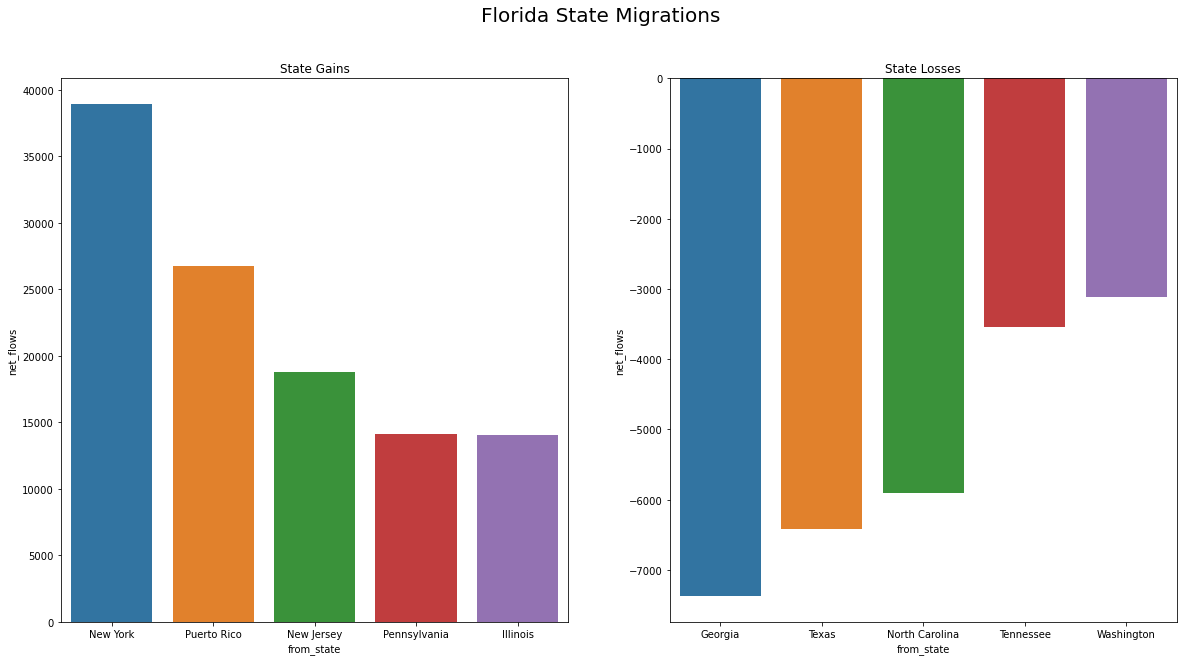

In [37]:
#Use subplots to visualize biggest state winners and losers. 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (20, 10))
sns.barplot(x=top_state_gains.from_state, y=top_state_gains.net_flows, ax=ax1)
sns.barplot(x=worst_state_losses.from_state, y=worst_state_losses.net_flows, ax=ax2)
ax1.set_title("State Gains")
ax2.set_title("State Losses")
fig.suptitle("Florida State Migrations", fontsize=20)

##### Analyze how much a role high-tax states play in Florida's population growth. 
The proxy used for overall taxation is state income tax. 

In [38]:
#Florida is known for having no income tax. 
#What percentage of it's movers came from high taxing states?
highest_taxers=['California', 'Oregon', 'Minnesota', 'New Jersey', 'Vermont', 'Washington D.C.', 'Iowa', 'New York', 'Wisconsin', 'Maine']

tax_movers= migrations.loc[migrations['from_state'].isin(highest_taxers)].groupby('from_state').sum().sort_values('net_flows', ascending=False).reset_index()
tax_mover_pcntg = ((tax_movers.net_flows.sum() / by_state.net_flows.sum()).round(2)) * 100
print("The total percentage of Florida's new residents that came from the ten highest taxing states is " + str(tax_mover_pcntg) + "%.")

The total percentage of Florida's new residents that came from the ten highest taxing states is 44.0%.


##### Begin basic county-level analysis and visualization.

In [39]:
#Analyze which Florida counties gained and lost the most.
by_county = migrations.groupby('florida_county').sum()
by_county['net_flows'] = by_county.inflows - by_county.outflows
by_county = by_county.sort_values('net_flows', ascending=False).reset_index()

#Gains
county_gains = by_county[by_county['net_flows'] > 0]
top_county_gains = county_gains[0:5]
print(top_county_gains)

#Losses
county_losses = by_county[by_county['net_flows'] < 0]
worst_county_losses = county_losses[-5:]
print(worst_county_losses)

        florida_county   inflows  outflows  net_flows
0        Orange County  114356.0   83625.0    30731.0
1    Palm Beach County   87981.0   58554.0    29427.0
2       Broward County  112307.0   87061.0    25246.0
3  Hillsborough County   96664.0   75095.0    21569.0
4           Lee County   46191.0   29395.0    16796.0
       florida_county   inflows  outflows  net_flows
62     Wakulla County    2619.0    2674.0      -55.0
63  Miami-Dade County  100750.0  100880.0     -130.0
64     Liberty County     781.0    1320.0     -539.0
65         Bay County   14416.0   15245.0     -829.0
66      Hardee County     908.0    2253.0    -1345.0


Text(0.5, 0.98, 'Florida County Migrations')

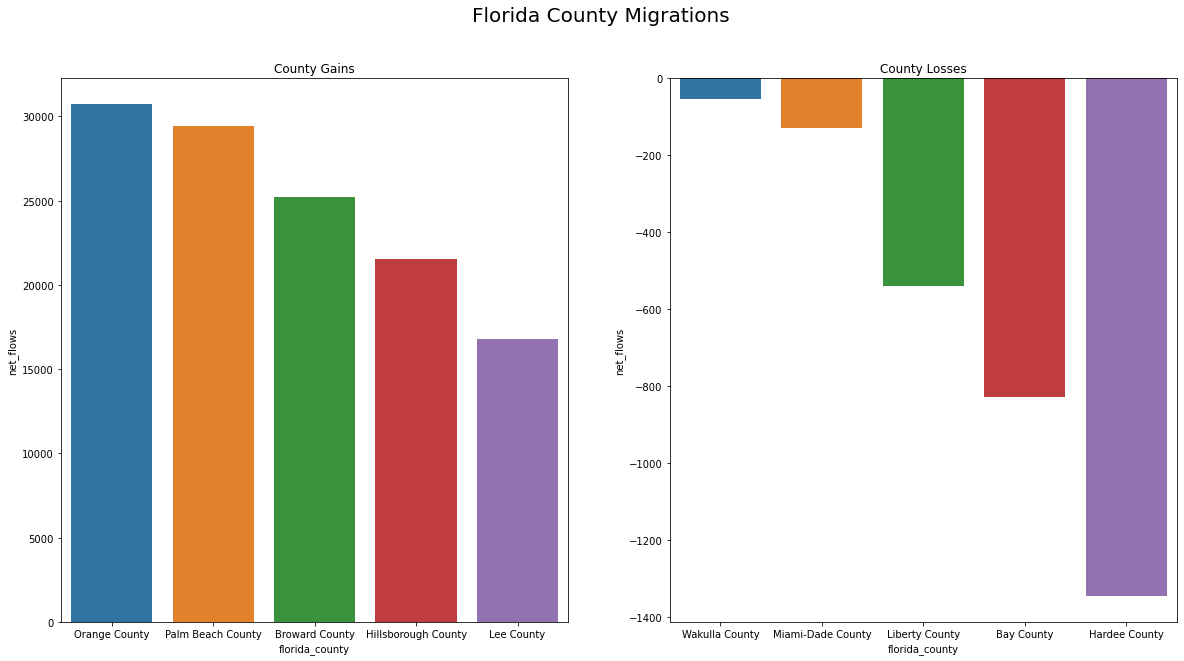

In [11]:
#Use subplots to visualize biggest county winners and losers. 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (20, 10))
sns.barplot(x=top_county_gains.florida_county, y=top_county_gains.net_flows, ax=ax1)
sns.barplot(x=worst_county_losses.florida_county, y=worst_county_losses.net_flows, ax=ax2)
ax1.set_title("County Gains")
ax2.set_title("County Losses")
fig.suptitle("Florida County Migrations", fontsize=20)

##### MSAs: 
Aside from seeing which counties were growing the most and which counties were losing the most, I wanted to understand which of these migrations were correlated with a Florida MSA (Metropolitan Statistical Area, as defined by the US Census Bureau ([here](https://www.census.gov/programs-surveys/metro-micro.html)). Based on these definitions, Florida's major MSA's are Miami-Fort Lauderdale-Palm Beach, Orlando-Kissimee, Jacksonville, and Tampa-St. Petersburg-Clearwater.

In [40]:
#Analyze which migration flows are correlated with Florida's 4 metropolitan statistical areas (MSAs).
msas = {'Miami-Dade County': 'Miami-FTL-Palm Beach', 'Broward County': 'Miami-FTL-Palm Beach',
           'Palm Beach County': 'Miami-FTL-Palm Beach', 'Orange County': 'Orlando-Kissimmee',
           'Seminole County': 'Orlando-Kissimmee', 'Osceola County': 'Orlando-Kissimmee',
           'Lake County': 'Orlando-Kissimmee', 'Hillsborough County': 'Tampa-STP-Clearwater',
           'Pinellas County': 'Tampa-STP-Clearwater', 'Pasco County': 'Tampa-STP-Clearwater',
           'Hernando County': 'Tampa-STP-Clearwater', 'Duval County': 'Jacksonville',
           'St. Johns County': 'Jacksonville', 'Clay County': 'Jacksonville', 'Nassau County': 'Jacksonville'}
by_county['msa']= by_county.florida_county.map(msas)
msa_moves= by_county.groupby('msa').sum('net_flows').sort_values('net_flows', ascending=False).reset_index()
print(msa_moves)

                    msa   inflows  outflows  net_flows
0     Orlando-Kissimmee  214425.0  155812.0    58613.0
1  Miami-FTL-Palm Beach  301038.0  246495.0    54543.0
2  Tampa-STP-Clearwater  204622.0  158735.0    45887.0
3          Jacksonville  112370.0   86566.0    25804.0


Text(0.5, 1.0, 'MSA Moves')

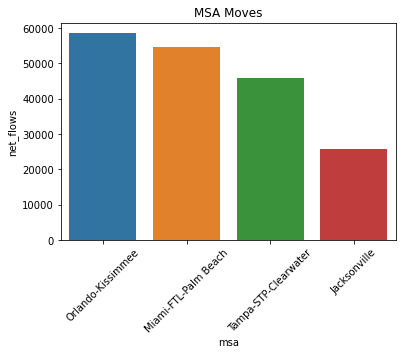

In [41]:
msa_moves_viz= sns.barplot(x=msa_moves.msa, y=msa_moves.net_flows)
msa_moves_viz.set_xticklabels(msa_moves_viz.get_xticklabels(), rotation=45)
msa_moves_viz.set_title("MSA Moves")

##### Destinations: 
I also wanted to see how much of the migrations were to what I called _destinations_. I defined _destinations_ anecdotally based off my experience of living in Florida for the last 15 years. Loosely defined, these are areas separate around the state from Florida's MSAs that are well-known destinations for vacationers and retirees. 

In [43]:
destinations= {'Sarasota County': 'Sarasota', 'Manatee County': 'Lakewood Ranch', 'Sumter County': 'The Villages',
                   'Lee County': 'Fort Myers', 'Collier County': 'Naples, Marco Island',
                   'St. Lucie County': 'Port St. Lucie', 'Monroe County': 'Florida Keys',
                   'Okaloosa County': 'Destin', 'Escambia County': 'Pensacola'}
by_county['destinations']=by_county.florida_county.map(destinations)

In [44]:
destination_moves=by_county.groupby('destinations').sum('net_flows').sort_values('net_flows', ascending=False).reset_index()
print(destination_moves)

           destinations  inflows  outflows  net_flows
0            Fort Myers  46191.0   29395.0    16796.0
1        Lakewood Ranch  30165.0   18267.0    11898.0
2  Naples, Marco Island  28426.0   17732.0    10694.0
3              Sarasota  29631.0   20786.0     8845.0
4        Port St. Lucie  22756.0   14745.0     8011.0
5             Pensacola  28165.0   23148.0     5017.0
6          The Villages   9918.0    6253.0     3665.0
7          Florida Keys   7581.0    6642.0      939.0
8                Destin  20607.0   20208.0      399.0


Text(0.5, 1.0, 'Destination Moves')

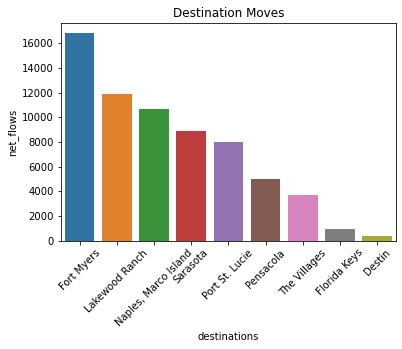

In [45]:
destination_moves_viz=sns.barplot(x=destination_moves.destinations, y=destination_moves.net_flows)
destination_moves_viz.set_xticklabels(destination_moves_viz.get_xticklabels(), rotation=45)
destination_moves_viz.set_title("Destination Moves")

### Conclusions: 
What can we ascertain from these analyses? A few takeaways:
1. Northern states contribute a high amount to Florida's growth. When examining only the contiguous United States, the top 10 contributors to Florida's growth are all in the northeast or midwest. 
2. Taxes could be a contributing factor, as the top 10 heaviest taxers by way of state income tax contributed 44% of Florida's growth in this timeframe (2014-2018). However, I did not establish causality in this analysis. Another factor that is often mentioned when people move to Florida is the warm weather: this reasoning would map just as well with my analysis here. 
3. All of Florida's major MSAs show strong signs of growth. Orlando-Kissimee leads the way, gaining nearly 60,000 new residents during this time period. Miami-Fort Lauderdale-Palm Beach is close behind, and Tampa and Jacksonville both grew substantially as well.
4. Destinations separate from Florida's MSAs also did well. The clear winners are on Florida's southwest coast. This is where Fort Myers, Lakewood Ranch, Sarasota, and Naples/Marco Island are all located. 

**Thanks for checking out my project!**